# Regression

In diesem Kapitel werden wir uns der (linearen) Regression widmen. Dies wird es uns erlauben, dass wir Trends in 
Daten besser analysieren können.

## Methode der kleinsten Quadrate

Die Methode der kleinsten Quadrate (engl. Linear Least Squares) geht auf 
[Carl Friedrich Gauss](https://de.wikipedia.org/wiki/Carl_Friedrich_Gau%C3%9F) zurück. Ziel ist es bei dieser Methode,
dass man die Gerade findet, welche im quadratischen Mittel am dichtesten an allen Punkten liegt. Visuell sieht dies 
wie folgt aus:

```{figure} ../Bilder/Linear_least_squares_example2.png
:name: LLS

Ein Beispiel für die Methode der kleinsten Quadrate. [Quelle](https://en.wikipedia.org/wiki/Linear_least_squares)
```

Allerdings muss diese Methode keineswegs auf lineare Funktionen einschränken. Die gleiche Idee überträgt sich 
eins zu eins auf Funktionen höherer Ordnung. Einziger Nachteil ist, dass man die (ungefähre) Ordnung der Funktion kennen
muss. Allerdings reicht es in aller Regel aus die Funktion zu plotten, damit man eine gute Näherung der Ordnung der
Funktion erhält. In Python kann man dies z.B. wie folgt implementieren:

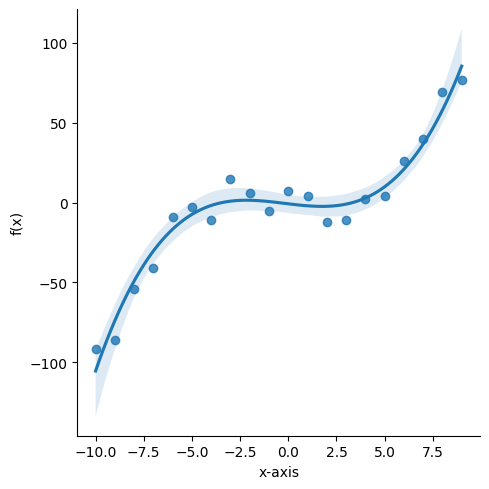

In [1]:
# `seaborn` ist ein weiteres tool zum plotten 
# und ist im Prinzip eine Weiterentwicklung zu
# pyplot. So können wir ganz einfach gefittete
# Funktion und die Datenpunkte zusammen plotten.
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generieren verrauschter Daten
def gen_noisy_data(x_vals):
    f_vals = np.zeros_like(x_vals)

    for (i, x) in enumerate(x_vals):
        noise = np.random.normal(0,10,1)
        f_vals[i] = 0.1*x**3 + 0.2*x + noise

    return f_vals

x_vals = np.arange(-10, 10, 1)
data = gen_noisy_data(x_vals)

# transformieren der Daten
data = {"x-axis": x_vals, "f(x)": data}
data = pd.DataFrame(data)

# plotten der Daten mit gefitteter Funktion;
# wir wissen hier natürlich die Ordnung der Funktion
# und können direkt den richtigen `Guess` einsetzen.
sb.lmplot(x='x-axis', y='f(x)', data=data, order=3)
plt.show()